In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [2]:
!unzip tokenized.zip

Archive:  tokenized.zip
   creating: tokenized/
 extracting: tokenized/dataset_dict.json  
   creating: tokenized/tokenizer/
  inflating: tokenized/tokenizer/special_tokens_map.json  
  inflating: tokenized/tokenizer/tokenizer.json  
  inflating: tokenized/tokenizer/tokenizer_config.json  
   creating: tokenized/train/
  inflating: tokenized/train/data-00000-of-00003.arrow  
  inflating: tokenized/train/data-00001-of-00003.arrow  
  inflating: tokenized/train/data-00002-of-00003.arrow  
  inflating: tokenized/train/dataset_info.json  
  inflating: tokenized/train/state.json  
   creating: tokenized/validation/
  inflating: tokenized/validation/data-00000-of-00001.arrow  
  inflating: tokenized/validation/dataset_info.json  
  inflating: tokenized/validation/state.json  


In [3]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_from_disk, DatasetDict

In [4]:
tokenized_path = "/content/tokenized"
dataset = DatasetDict.load_from_disk(tokenized_path)

In [5]:
def plot_sequence_lengths(ds, split_name):
    lengths = [len(x['input_ids']) for x in ds]
    plt.figure(figsize=(10, 5))
    sns.histplot(lengths, bins=50, kde=True, color="dodgerblue")
    plt.title(f'{split_name} - Input Length Distribution')
    plt.xlabel("Sequence Length")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

In [6]:
def plot_token_frequency(ds, tokenizer, N=20):
    from collections import Counter
    all_tokens = sum([x['input_ids'] for x in ds], [])
    token_freq = Counter(all_tokens)
    most_common = token_freq.most_common(N)
    tokens = [tokenizer.decode([i]) for i, _ in most_common]
    freqs = [freq for _, freq in most_common]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=freqs, y=tokens, palette="viridis")
    plt.title(f'Top {N} Most Frequent Tokens')
    plt.xlabel("Frequency")
    plt.ylabel("Token")
    plt.grid(True)
    plt.show()

In [7]:
def inspect_samples(ds, tokenizer, n=5):
    print("\nSample decoded entries:")
    for i in range(n):
        decoded = tokenizer.decode(ds[i]['input_ids'], skip_special_tokens=True)
        print(f"\n[{i}] {decoded[:500]}...")

In [8]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=os.path.join(tokenized_path, "tokenizer", "tokenizer.json"))



=== EDA for Split: TRAIN ===
Total samples: 103908
Features: {'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}


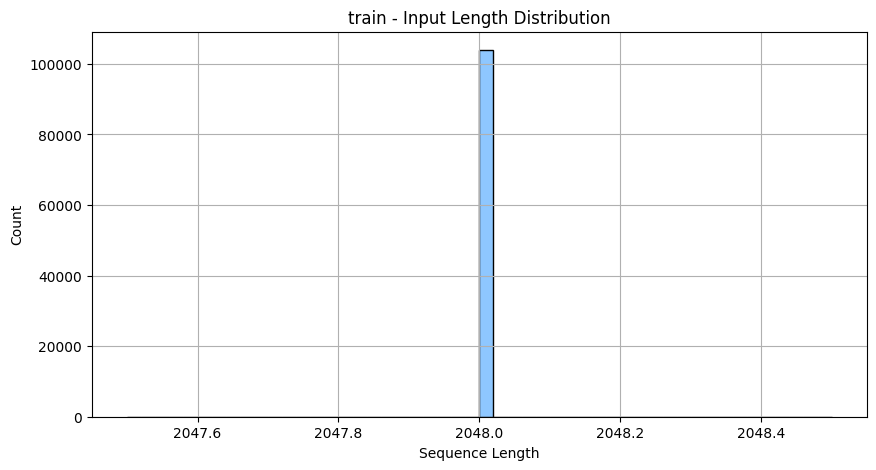

In [ ]:
for split in dataset:
    print(f"\n=== EDA for Split: {split.upper()} ===")
    ds = dataset[split]

    # Basic Stats
    print(f"Total samples: {len(ds)}")
    print(f"Features: {ds.features}")

    # Sequence length plot
    plot_sequence_lengths(ds, split)

    # Token frequency visualization
    plot_token_frequency(ds, tokenizer)

    # Sample inspection
    inspect_samples(ds, tokenizer)

    # Token length summary
    token_lengths = [len(x['input_ids']) for x in ds]
    summary_df = pd.DataFrame(token_lengths, columns=["length"])
    print("\nToken Length Stats:")
    print(summary_df.describe())

    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=summary_df["length"], color="lightcoral")
    plt.title(f'{split} - Token Length Distribution (Boxplot)')
    plt.xlabel("Token Length")
    plt.grid(True)
    plt.show()